In [39]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib

from astropy.io import fits
from time import sleep
from IPython import display
from astropy import units as u
from astropy.io import fits
import os
import os.path
from astropy.coordinates import SkyCoord
from astropy.coordinates import FK5

import imageio


from gPhoton import gFind
from gPhoton import gAperture
from gPhoton import gMap
from gPhoton.gphoton_utils import read_lc
import datetime

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [6]:
ra = 301.5644
dec = 44.45684


In [7]:
exp_data = gFind(band='NUV', skypos=[ra, dec], exponly=True)

exp_data

NUV: 3311.0s (raw) in 4 exposures.


{'NUV': {'expt': 3311.0,
  'nearest_source': {'distance': 6.5512874478239989e-05,
   'mag': 16.460850000000001,
   'skypos': [301.564352375925, 44.4567839963424]},
  't0': array([  9.93336632e+08,   9.93367098e+08,   9.95690522e+08,
           9.99270098e+08]),
  't1': array([  9.93338307e+08,   9.93367186e+08,   9.95691962e+08,
           9.99270206e+08])}}

In [8]:
(exp_data['NUV']['t0'] - exp_data['NUV']['t0'][0]) / (60. * 60. * 24. * 365.)

array([ 0.        ,  0.00096607,  0.07464136,  0.18814897])

In [9]:
step_size = 20. # the time resolution in seconds

# img_step_size = 30.
# img_size = [0.1, 0.1]
phot_rad = 0.0045 # in deg
ap_in = 0.0050 # in deg
ap_out = 0.0060 # in deg

In [13]:
exp_data = gFind(band="NUV", skypos=[ra, dec], exponly=True)
k = 0;
timeArray = []
for tstart, tstop in zip(exp_data['NUV']['t0'], exp_data['NUV']['t1']):
        
        timeArray.append((tstart, tstop))
        print(timeArray[k][0],timeArray[k][1],timeArray[k][1]-timeArray[k][0])
        k = k + 1

NUV: 3311.0s (raw) in 4 exposures.
993336631.995 993338306.995 1675.0
993367097.995 993367185.995 88.0
995690521.995 995691961.995 1440.0
999270097.995 999270205.995 108.0


In [14]:
target = 'KIC8462852'

flux = np.zeros(len(exp_data['NUV']['t0']))

aVar = True
counter = 0

currentTime = str(datetime.datetime.now())
currentTime = currentTime.split(" ")
currentTime = currentTime[1].split(":")
currentTime = str(currentTime[0])+":"+str(currentTime[1])

currentDate = str(datetime.date.today()) + "_" + str(counter)
while(aVar):
    if not os.path.exists(currentDate):
        os.makedirs(currentDate)
        os.makedirs(currentDate + "/ds9_Images")
        os.makedirs(currentDate + "/data")
#         os.makedirs(currentDate + "/Lightcurves")
        aVar = False
    else:
        counter = counter + 1 
        currentDate = str(datetime.date.today()) + "_" + str(counter)
        avar = True

print(datetime.datetime.now())
for k in range(len(exp_data['NUV']['t0'])):
    photon_events = gAperture(band='NUV', skypos=[ra, dec], stepsz=step_size, radius= phot_rad,
                              annulus=[ap_in, ap_out], verbose=3, csvfile=currentDate+"/data/"+target+ '_' +str(k)+"_lc.csv",
                              trange=[int(exp_data['NUV']['t0'][k]), int(exp_data['NUV']['t1'][k])+1], 
                              overwrite=True)
    data = read_lc(currentDate+'/data/'+target+ '_' +str(k)+"_lc.csv")
    flux[k] = np.median(data['flux_bgsub'])
    print(datetime.datetime.now(), k)

2017-06-01 17:27:52.063577
Using v1.28.4 of gAperture.
Generating a light curve with the following paramters:
 band:    NUV
 skypos:  [301.5644, 44.45684]
 tranges: [993336631, 993338307]
 radius:  0.0045
 annulus: [0.005, 0.006]
 stepsz:  20.0
 csvfile: 2017-06-01_1/data/KIC8462852_0_lc.csv
 verbose: 3
2017-06-01 17:29:15.538701 0                                84]                                                            
Using v1.28.4 of gAperture.
Generating a light curve with the following paramters:
 band:    NUV
 skypos:  [301.5644, 44.45684]
 tranges: [993367097, 993367186]
 radius:  0.0045
 annulus: [0.005, 0.006]
 stepsz:  20.0
 csvfile: 2017-06-01_1/data/KIC8462852_1_lc.csv
 verbose: 3
2017-06-01 17:29:29.680115 1                                84]                                                            
Using v1.28.4 of gAperture.
Generating a light curve with the following paramters:
 band:    NUV
 skypos:  [301.5644, 44.45684]
 tranges: [995690521, 995691962]
 radius:

In [30]:
for k in range(0,len(timeArray)):  
    w = str(k)
    gMap(band= "NUV", skypos=[ra, dec], stepsz=1 , skyrange=[0.010, 0.010],
             cntfile= currentDate+"/ds9_Images/"+"Boyajian_Star_visitNumber(step_size=01)_"+w+".fits",
             trange=[timeArray[k][0], timeArray[k][1]])

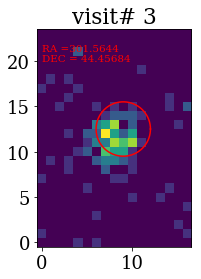

In [36]:
file1 = "2017-06-01_1/ds9_Images/Boyajian_Star_visitNumber(step_size=10)_" #as an example
file = file1 + "0.fits"
hdulist = fits.open(file)
hdulist.info()
hdulist[0].header
c_x = hdulist[0].header['CRPIX1']
c_y = hdulist[0].header['CRPIX2']
ra = hdulist[0].header['CRVAL1']
dec = hdulist[0].header['CRVAL2']

k = 0
while(os.path.exists(file)):
# for k in range(0,74):
    w = str(k);
    k = k + 1
    file = file1 + w + ".fits"
    if(not os.path.exists(file)):
        break
    hdulist = fits.open(file)
    cube = hdulist[0].data
    for b in range(0,len(cube)):
        plt.title("visit# " + w)
        plt.imshow(cube[b,:,:], origin='lower')
        x = 3*np.cos(np.arange(0,2*np.pi,.001)) + c_x
        y = 3*np.sin(np.arange(0,2*np.pi,.001)) + c_y
        plt.plot(x,y,c='red')
        plt.annotate("RA =" + str(ra) + "\n" + "DEC = " + str(dec), xy = (0, 20), size = "xx-small", color = 'r')
        plt.show()
        display.clear_output(wait=True)
        sleep(.01)

Filename: 2017-06-01_1/ds9_Images/Boyajian_Star_visitNumber(step_size=10)_0.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      22   (17, 24, 50)   float64   


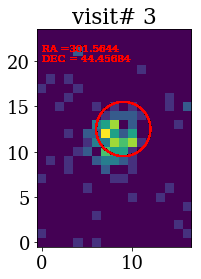

In [43]:
file1 = "2017-06-01_1/ds9_Images/Boyajian_Star_visitNumber(step_size=01)_" #as an example
file = file1 + "0.fits"
hdulist = fits.open(file)
hdulist.info()
hdulist[0].header
c_x = hdulist[0].header['CRPIX1']
c_y = hdulist[0].header['CRPIX2']
ra = hdulist[0].header['CRVAL1']
dec = hdulist[0].header['CRVAL2']

k = 0
imageArray = []
while(os.path.exists(file)):
# for k in range(0,74):
    w = str(k);
    k = k + 1
    file = file1 + w + ".fits"
    if( not os.path.exists(file)):
        break
    hdulist = fits.open(file)
    cube = hdulist[0].data
    for b in range(0,len(cube)):
        plt.title("visit# " + w)
        plt.imshow(cube[b,:,:], origin='lower')
        x = 3*np.cos(np.arange(0,2*np.pi,.001)) + c_x
        y = 3*np.sin(np.arange(0,2*np.pi,.001)) + c_y
        plt.plot(x,y,c='red')
        plt.annotate("RA =" + str(ra) + "\n" + "DEC = " + str(dec), xy = (0, 20), size = "xx-small", color = 'r')
        
        name = "2017-06-01_1/gif/images/image"+str(b)+"_"+str(k-1)+".png"
        plt.savefig(name)
        imageArray.append(imageio.imread(name))
        imageio.mimsave("2017-06-01_1/gif/01_seconds.gif",imageArray)